In [4]:
#Percentil sin librerias
def ordenamientoBurbuja(lista):
    n = len(lista)
    for i in range(n):
        for j in range(0, n-i-1):
            if lista[j] > lista[j+1]:
                lista[j], lista[j+1] = lista[j+1], lista[j]
    return lista

def calculoPercentil(datosNumericos, k):
    #Ordenar los datos y obtienen la longitud de la lista
    datosOrdenados = ordenamientoBurbuja(datosNumericos)
    cantidadDatos = len(datosNumericos)

    # fomula del percentil Pk = (k/100)*(n-1)
    pos = k / 100 * (cantidadDatos - 1)

    #Determinar el percentil
    if pos.is_integer():
        return datosOrdenados[int(pos)]
    else:
        # Interpolación, en caso que el numero no sea entero
        # obtiene el valor entero ejemplo: si es 3.7 obtiene solo el 3
        indice_de_abajo = int(pos)
        # le suma 1 para obtener el indice superior
        indide_de_arriba = indice_de_abajo + 1
        parte_fraccional = pos - indice_de_abajo
        datoInterpolado = datosOrdenados[indice_de_abajo] + parte_fraccional * (datosOrdenados[indide_de_arriba] - datosOrdenados[indice_de_abajo])

        return datoInterpolado


In [1]:
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Dataset_Spotify/Spotify_Most_Streamed_Songs.csv")
# Mostrar las primeras filas del csv
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url,mode
0,'Seven (feat. Latto) (Explicit Ver.)','Latto Jung Kook',2,2023,7,14,553,147,141381703,43,...,'B',80,89,83,31,0,8,4,'Not Found',Major
1,'LALA','Myke Towers',1,2023,3,23,1474,48,133716286,48,...,'C#',71,61,74,7,0,10,4,'https://i.scdn.co/image/ab67616d0000b2730656d...,Major
2,'vampire','Olivia Rodrigo',1,2023,6,30,1397,113,140003974,94,...,'F',51,32,53,17,0,31,6,'https://i.scdn.co/image/ab67616d0000b273e8525...,Major
3,'Cruel Summer','Taylor Swift',1,2019,8,23,7858,100,800840817,116,...,'A',55,58,72,11,0,11,15,'https://i.scdn.co/image/ab67616d0000b273e787c...,Major
4,'WHERE SHE GOES','Bad Bunny',1,2023,5,18,3133,50,303236322,84,...,'A',65,23,80,14,63,11,6,'https://i.scdn.co/image/ab67616d0000b273ab5c9...,Minor


In [5]:
#Para la columna cantidad de artistas en la cancion
artist_count = df['artist_count']  #obtengo la columna del csv

# Para convertir la serie en una lista.
lista_datos = artist_count.tolist()

print(lista_datos)
#Percentil 90
percentil_90 = calculoPercentil(lista_datos, 90)

#Cuartiles 1,2,3 son los percentiles 25,50(mediana),75 respectivamente
Q1 = calculoPercentil(lista_datos, 25)
Q2 = calculoPercentil(lista_datos, 50)
Q3 = calculoPercentil(lista_datos, 75)

print(f"Percentil 90: {percentil_90}")

print(f"Cuartil 1: {Q1}")
print(f"Cuartil 2: {Q2}")
print(f"Cuartil 3: {Q3}")



[2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 1, 2, 3, 1, 2, 8, 2, 1, 1, 1, 2, 2, 2, 3, 3, 1, 1, 1, 2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 3, 1, 2, 2, 1, 2, 1, 1, 3, 1, 2, 2, 1, 1, 1, 2, 1, 4, 3, 5, 1, 1, 1, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 3, 2, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 5, 1, 3, 3, 1, 1, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 2, 2, 3, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 5, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 3, 1, 1, 3, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 3, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 5, 3, 1, 1, 2, 

In [6]:
#Para la columna año de lanzamiento de una cancion
released_year = df['released_year']  #obtengo la columna del csv

# Para convertir la serie en una lista.
lista_datos = released_year.tolist()

print(lista_datos)
#Percentil 90
percentil_90 = calculoPercentil(lista_datos, 90)

#Cuartiles 1,2,3 son los percentiles 25,50(mediana),75 respectivamente
Q1 = calculoPercentil(lista_datos, 25)
Q2 = calculoPercentil(lista_datos, 50)
Q3 = calculoPercentil(lista_datos, 75)

print(f"Percentil 90: {percentil_90}")

print(f"Cuartil 1: {Q1}")
print(f"Cuartil 2: {Q2}")
print(f"Cuartil 3: {Q3}")


[2023, 2023, 2023, 2019, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2022, 2022, 2023, 2023, 2023, 2023, 2023, 2023, 2013, 2023, 2023, 2023, 2022, 2023, 2023, 2023, 2023, 2023, 2022, 2022, 2023, 2023, 2023, 2014, 2014, 2023, 2023, 2018, 2022, 2017, 2023, 2020, 2022, 2016, 2016, 2023, 2023, 2023, 2023, 2023, 2012, 2019, 2023, 2022, 2023, 2020, 2023, 2023, 2022, 2023, 2022, 1999, 2022, 2022, 2023, 2023, 2023, 2020, 2022, 2012, 2022, 2008, 2022, 2022, 2022, 2023, 1975, 2022, 2023, 2023, 2021, 2023, 2018, 2022, 2015, 2012, 2023, 2023, 2023, 2017, 2020, 2023, 2023, 2022, 2011, 2023, 2012, 2022, 2023, 2004, 2023, 2022, 2017, 2017, 2021, 2011, 2012, 2022, 2023, 2023, 1985, 2014, 2023, 2023, 2023, 2020, 2023, 2023, 2022, 2022, 2021, 2022, 2011, 2019, 2017, 2023, 2023, 2023, 2011, 2023, 2007, 2023, 2022, 2023, 2017, 2022, 2017, 2023, 2023, 2002, 2023, 2016, 2022, 2004, 2019, 2023, 2023, 2023, 2010, 2023, 2012, 2023, 2022, 2013, 2021, 2019, 2023, 2004, 2016, 2010, 2020, 2010, 198

In [7]:
#Para la columna mes de lanzamiento de una cancion
released_month = df['released_month']  #obtengo la columna del csv

# Para convertir la serie en una lista.
lista_datos = released_month.tolist()

print(lista_datos)
#Percentil 90
percentil_90 = calculoPercentil(lista_datos, 90)

#Cuartiles 1,2,3 son los percentiles 25,50(mediana),75 respectivamente
Q1 = calculoPercentil(lista_datos, 25)
Q2 = calculoPercentil(lista_datos, 50)
Q3 = calculoPercentil(lista_datos, 75)

print(f"Percentil 90: {percentil_90}")

print(f"Cuartil 1: {Q1}")
print(f"Cuartil 2: {Q2}")
print(f"Cuartil 3: {Q3}")


[7, 3, 6, 8, 5, 6, 3, 7, 5, 3, 4, 7, 1, 4, 3, 12, 2, 7, 3, 3, 6, 7, 1, 5, 6, 6, 3, 6, 1, 5, 7, 6, 12, 10, 2, 6, 4, 1, 1, 5, 2, 10, 8, 7, 6, 11, 5, 11, 9, 2, 6, 4, 2, 6, 10, 11, 2, 5, 7, 7, 5, 2, 6, 3, 10, 1, 10, 12, 7, 7, 6, 6, 7, 5, 7, 1, 7, 9, 12, 6, 1, 4, 6, 7, 7, 3, 11, 5, 6, 6, 3, 3, 3, 11, 6, 5, 3, 12, 1, 6, 1, 12, 4, 1, 7, 4, 11, 4, 3, 1, 1, 12, 6, 7, 2, 12, 2, 2, 5, 7, 6, 3, 7, 12, 6, 8, 8, 11, 8, 6, 5, 1, 1, 1, 4, 6, 12, 5, 1, 7, 1, 5, 6, 1, 7, 11, 5, 1, 5, 1, 6, 5, 1, 2, 12, 4, 6, 1, 3, 10, 1, 7, 4, 1, 3, 5, 1, 2, 1, 12, 5, 6, 1, 1, 4, 11, 1, 1, 3, 1, 11, 1, 9, 10, 3, 5, 8, 8, 1, 9, 12, 4, 5, 7, 2, 7, 7, 6, 12, 10, 6, 5, 5, 11, 5, 6, 5, 3, 6, 3, 5, 9, 6, 3, 6, 3, 10, 11, 5, 12, 4, 12, 12, 5, 11, 5, 5, 7, 6, 3, 6, 7, 6, 5, 4, 4, 5, 10, 6, 5, 1, 2, 10, 1, 9, 11, 10, 5, 6, 2, 1, 12, 12, 6, 5, 5, 5, 4, 4, 2, 4, 2, 4, 2, 4, 1, 3, 4, 4, 4, 8, 4, 4, 2, 9, 12, 4, 8, 7, 10, 2, 4, 11, 6, 11, 4, 12, 3, 3, 5, 9, 12, 3, 3, 2, 12, 1, 5, 3, 4, 3, 3, 3, 11, 3, 3, 12, 3, 5, 12, 3, 4, 3, 3, 10

In [8]:
#Para la columna dia de lanzamiento de una cancion
released_day = df['released_day']  #obtengo la columna del csv

# Para convertir la serie en una lista.
lista_datos = released_day.tolist()

print(lista_datos)
#Percentil 90
percentil_90 = calculoPercentil(lista_datos, 90)

#Cuartiles 1,2,3 son los percentiles 25,50(mediana),75 respectivamente
Q1 = calculoPercentil(lista_datos, 25)
Q2 = calculoPercentil(lista_datos, 50)
Q3 = calculoPercentil(lista_datos, 75)

print(f"Percentil 90: {percentil_90}")

print(f"Cuartil 1: {Q1}")
print(f"Cuartil 2: {Q2}")
print(f"Cuartil 3: {Q3}")

[14, 23, 30, 23, 18, 1, 16, 7, 15, 17, 17, 7, 12, 14, 31, 8, 24, 13, 31, 24, 22, 7, 1, 31, 2, 22, 25, 29, 31, 25, 13, 28, 2, 21, 23, 1, 7, 1, 1, 19, 10, 9, 26, 21, 23, 27, 13, 24, 21, 24, 2, 6, 24, 15, 15, 29, 24, 26, 14, 24, 4, 3, 24, 24, 6, 1, 21, 2, 14, 7, 23, 28, 15, 14, 6, 1, 17, 22, 20, 22, 1, 22, 23, 7, 9, 3, 8, 6, 22, 20, 24, 17, 17, 8, 5, 12, 17, 9, 1, 9, 1, 2, 14, 1, 7, 20, 10, 28, 11, 1, 1, 2, 22, 7, 17, 9, 25, 8, 12, 24, 22, 10, 15, 9, 11, 19, 16, 17, 11, 21, 15, 2, 1, 11, 20, 2, 2, 22, 1, 20, 31, 19, 1, 1, 13, 24, 6, 1, 10, 27, 30, 26, 1, 2, 5, 4, 17, 1, 19, 4, 23, 13, 4, 1, 20, 25, 6, 2, 1, 5, 25, 2, 1, 1, 12, 25, 1, 1, 19, 6, 17, 13, 21, 18, 21, 19, 20, 30, 1, 13, 16, 9, 6, 7, 10, 1, 20, 8, 19, 19, 2, 1, 11, 24, 15, 2, 26, 30, 2, 17, 13, 29, 2, 31, 2, 23, 12, 30, 26, 2, 4, 2, 1, 26, 30, 22, 26, 8, 2, 1, 29, 29, 5, 18, 21, 7, 19, 21, 2, 6, 27, 14, 17, 21, 1, 4, 14, 11, 2, 14, 1, 16, 10, 10, 4, 5, 1, 21, 30, 24, 7, 2, 8, 24, 10, 1, 4, 24, 22, 21, 23, 21, 14, 3, 9, 30, 25, 

In [9]:
#Para la columna en cuantas listas de musica esta una cancion
in_spotify_playlists = df['in_spotify_playlists']  #obtengo la columna del csv

# Para convertir la serie en una lista.
lista_datos = in_spotify_playlists.tolist()

print(lista_datos)
#Percentil 90
percentil_90 = calculoPercentil(lista_datos, 90)

#Cuartiles 1,2,3 son los percentiles 25,50(mediana),75 respectivamente
Q1 = calculoPercentil(lista_datos, 25)
Q2 = calculoPercentil(lista_datos, 50)
Q3 = calculoPercentil(lista_datos, 75)

print(f"Percentil 90: {percentil_90}")

print(f"Cuartil 1: {Q1}")
print(f"Cuartil 2: {Q2}")
print(f"Cuartil 3: {Q3}")

[553, 1474, 1397, 7858, 3133, 2186, 3090, 714, 1096, 2953, 2876, 422, 12211, 3528, 23575, 8109, 2942, 873, 2610, 596, 332, 516, 12859, 1313, 1945, 250, 7112, 859, 2420, 2988, 864, 266, 6036, 9082, 4284, 1150, 672, 11434, 7830, 584, 692, 24094, 12482, 13387, 1117, 3372, 8431, 2483, 29536, 3408, 1298, 4277, 1133, 2259, 18371, 43899, 2649, 6804, 525, 7923, 731, 5184, 3107, 4053, 4637, 31358, 3818, 3506, 410, 148, 1004, 22543, 4511, 16413, 8506, 33898, 3246, 8576, 3618, 370, 31123, 2790, 267, 139, 17050, 2114, 17836, 8870, 6060, 641, 1446, 804, 1962, 4875, 31, 2175, 2000, 2839, 20333, 674, 8448, 2110, 2528, 12985, 77, 266, 21097, 3423, 4198, 14739, 26792, 213, 58, 99, 41751, 21164, 2988, 893, 1094, 7324, 201, 5120, 2346, 763, 457, 3430, 6074, 21915, 15032, 871, 451, 1783, 9389, 5724, 13985, 1051, 1682, 182, 16596, 2335, 18986, 283, 293, 21081, 437, 1275, 6135, 20015, 1507, 539, 86, 324, 17138, 894, 1622, 561, 5871, 29215, 5866, 3859, 961, 6457, 43257, 4564, 12688, 13801, 22439, 18515, 3684

In [10]:
#Para la columna ranking de la cancion en Spotify
in_spotify_charts = df['in_spotify_charts']  #obtengo la columna del csv

# Para convertir la serie en una lista.
lista_datos = in_spotify_charts.tolist()

print(lista_datos)
#Percentil 90
percentil_90 = calculoPercentil(lista_datos, 90)

#Cuartiles 1,2,3 son los percentiles 25,50(mediana),75 respectivamente
Q1 = calculoPercentil(lista_datos, 25)
Q2 = calculoPercentil(lista_datos, 50)
Q3 = calculoPercentil(lista_datos, 75)

print(f"Percentil 90: {percentil_90}")

print(f"Cuartil 1: {Q1}")
print(f"Cuartil 2: {Q2}")
print(f"Cuartil 3: {Q3}")

[147, 48, 113, 100, 50, 91, 50, 43, 83, 44, 40, 55, 115, 98, 130, 77, 77, 104, 40, 68, 26, 38, 110, 40, 87, 26, 77, 40, 19, 101, 78, 34, 88, 56, 49, 31, 34, 53, 42, 28, 25, 78, 80, 64, 80, 19, 76, 59, 79, 47, 38, 66, 39, 59, 83, 69, 42, 45, 41, 29, 15, 41, 39, 50, 38, 43, 23, 56, 36, 24, 35, 63, 36, 61, 45, 62, 23, 42, 38, 20, 55, 30, 9, 17, 36, 44, 53, 43, 53, 50, 12, 25, 38, 23, 39, 23, 46, 25, 52, 47, 23, 58, 39, 61, 35, 27, 52, 21, 44, 43, 32, 6, 18, 15, 25, 36, 59, 38, 34, 22, 11, 48, 27, 26, 24, 38, 52, 34, 30, 32, 33, 27, 46, 44, 25, 16, 46, 8, 13, 23, 23, 7, 8, 43, 31, 32, 38, 16, 14, 21, 8, 14, 37, 9, 9, 14, 27, 43, 24, 26, 26, 18, 24, 16, 13, 19, 19, 35, 21, 11, 19, 16, 26, 13, 16, 17, 13, 29, 18, 10, 18, 14, 7, 10, 17, 8, 30, 16, 13, 31, 22, 12, 42, 11, 14, 14, 36, 33, 22, 17, 4, 14, 29, 19, 6, 19, 0, 10, 5, 13, 5, 6, 3, 18, 0, 30, 25, 34, 0, 16, 8, 36, 10, 2, 6, 69, 5, 36, 1, 5, 12, 10, 6, 22, 34, 6, 0, 8, 0, 33, 5, 24, 13, 13, 4, 18, 20, 4, 0, 2, 27, 20, 32, 6, 1, 0, 13, 1

In [16]:
#Para la columna cantidad de reproducciones
streams = df['streams']  #obtengo la columna del csv

# Para convertir la serie en una lista.
lista_datos = streams.tolist()

print(lista_datos)
#Percentil 90
percentil_90 = calculoPercentil(lista_datos, 90)

#Cuartiles 1,2,3 son los percentiles 25,50(mediana),75 respectivamente
Q1 = calculoPercentil(lista_datos, 25)
Q2 = calculoPercentil(lista_datos, 50)
Q3 = calculoPercentil(lista_datos, 75)

print(f"Percentil 90: {percentil_90}")

print(f"Cuartil 1: {Q1}")
print(f"Cuartil 2: {Q2}")
print(f"Cuartil 3: {Q3}")

[141381703, 133716286, 140003974, 800840817, 303236322, 183706234, 725980112, 58149378, 95217315, 553634067, 505671438, 58255150, 1316855716, 387570742, 2513188493, 1163093654, 496795686, 30546883, 335222234, 363369738, 86444842, 52135248, 1297026226, 200647221, 115364561, 78300654, 899183384, 61245289, 429829812, 127408954, 22581161, 52294266, 843957510, 999748277, 618990393, 123122413, 188933502, 1355959075, 786181836, 176553476, 354495408, 2808096550, 1109433169, 1047101291, 65156199, 570515054, 1085685420, 1647990401, 2565529693, 518745108, 107753850, 177740666, 153372011, 57876440, 1813673666, 3703895074, 256483385, 1214083358, 16011326, 812019557, 111947664, 156338624, 720434240, 357925728, 674072710, 1755214421, 404562836, 373199958, 14780425, 39578178, 54266102, 2557975762, 751134527, 2282771485, 1356565093, 1592909789, 635412045, 1230675890, 585695368, 43857627, 2009094673, 600976848, 39709092, 39228929, 2665343922, 223633238, 2887241814, 1440757818, 165484133, 58054811, 15705

In [11]:
#Para la columna cantidad de veces que esta en una lista en Apple Music
in_apple_playlists = df['in_apple_playlists']  #obtengo la columna del csv

# Para convertir la serie en una lista.
lista_datos = in_apple_playlists.tolist()

print(lista_datos)
#Percentil 90
percentil_90 = calculoPercentil(lista_datos, 90)

#Cuartiles 1,2,3 son los percentiles 25,50(mediana),75 respectivamente
Q1 = calculoPercentil(lista_datos, 25)
Q2 = calculoPercentil(lista_datos, 50)
Q3 = calculoPercentil(lista_datos, 75)

print(f"Percentil 90: {percentil_90}")

print(f"Cuartil 1: {Q1}")
print(f"Cuartil 2: {Q2}")
print(f"Cuartil 3: {Q3}")

[43, 48, 94, 116, 84, 67, 34, 25, 60, 49, 41, 37, 300, 80, 403, 183, 91, 80, 43, 8, 11, 73, 24, 17, 74, 16, 202, 35, 52, 0, 71, 20, 113, 242, 115, 22, 19, 154, 94, 16, 10, 372, 291, 77, 82, 65, 241, 68, 281, 87, 44, 145, 14, 0, 250, 672, 67, 139, 34, 106, 27, 154, 38, 82, 63, 196, 37, 105, 36, 32, 42, 386, 70, 166, 94, 233, 94, 216, 47, 12, 300, 60, 9, 16, 492, 80, 440, 104, 150, 1, 57, 29, 28, 19, 2, 69, 49, 58, 89, 20, 160, 17, 56, 49, 8, 6, 384, 41, 98, 88, 69, 7, 2, 21, 101, 80, 74, 19, 40, 25, 19, 161, 69, 21, 8, 45, 201, 437, 221, 25, 10, 26, 24, 119, 30, 31, 24, 3, 7, 82, 250, 6, 5, 98, 17, 13, 71, 107, 24, 7, 7, 13, 119, 14, 0, 4, 81, 179, 107, 133, 19, 98, 433, 24, 197, 137, 211, 70, 321, 0, 0, 17, 133, 65, 35, 45, 328, 54, 148, 33, 60, 11, 146, 38, 61, 7, 112, 391, 82, 187, 27, 47, 124, 3, 1, 71, 4, 20, 28, 34, 13, 22, 37, 12, 6, 9, 15, 15, 18, 44, 8, 10, 5, 20, 5, 116, 116, 47, 23, 41, 8, 29, 10, 1, 118, 8, 23, 47, 1, 7, 155, 215, 6, 39, 29, 58, 34, 51, 3, 34, 8, 51, 72, 119

In [17]:
#Para la columna ranking de la cancion en Apple Music
in_apple_charts = df['in_apple_charts']  #obtengo la columna del csv

# Para convertir la serie en una lista.
lista_datos = in_apple_charts.tolist()

print(lista_datos)
#Percentil 90
percentil_90 = calculoPercentil(lista_datos, 90)

#Cuartiles 1,2,3 son los percentiles 25,50(mediana),75 respectivamente
Q1 = calculoPercentil(lista_datos, 25)
Q2 = calculoPercentil(lista_datos, 50)
Q3 = calculoPercentil(lista_datos, 75)

print(f"Percentil 90: {percentil_90}")

print(f"Cuartil 1: {Q1}")
print(f"Cuartil 2: {Q2}")
print(f"Cuartil 3: {Q3}")

[263, 126, 207, 207, 133, 213, 222, 89, 210, 110, 205, 202, 215, 156, 198, 162, 212, 227, 100, 104, 163, 119, 98, 152, 182, 149, 119, 109, 107, 0, 135, 185, 149, 142, 123, 33, 108, 123, 111, 159, 107, 117, 184, 58, 145, 48, 127, 21, 137, 86, 64, 111, 71, 0, 122, 199, 79, 111, 115, 112, 17, 84, 0, 121, 79, 2, 55, 64, 32, 93, 80, 144, 58, 87, 65, 0, 85, 108, 74, 16, 65, 96, 6, 72, 99, 75, 125, 120, 148, 52, 97, 76, 89, 45, 107, 145, 105, 156, 143, 106, 110, 119, 91, 98, 166, 40, 135, 100, 108, 112, 113, 6, 106, 52, 32, 65, 102, 23, 58, 81, 117, 115, 12, 110, 116, 69, 44, 115, 96, 59, 126, 124, 122, 108, 80, 37, 90, 88, 0, 55, 121, 9, 2, 76, 29, 8, 113, 69, 71, 71, 76, 110, 81, 88, 0, 14, 121, 97, 38, 181, 143, 95, 107, 101, 115, 125, 74, 82, 91, 0, 0, 60, 92, 82, 102, 85, 70, 70, 80, 0, 20, 84, 72, 25, 96, 10, 68, 73, 0, 99, 129, 90, 133, 33, 50, 37, 3, 46, 125, 0, 46, 18, 50, 117, 71, 101, 15, 92, 41, 34, 60, 79, 6, 110, 17, 69, 84, 77, 21, 69, 78, 65, 72, 0, 48, 96, 82, 66, 20, 29, 72,

In [18]:
#Para la columna cantidad de veces que una lista dezzer
in_deezer_playlists = df['in_deezer_playlists']  #obtengo la columna del csv

# Para convertir la serie en una lista.
lista_datos = in_deezer_playlists.tolist()

print(lista_datos)
#Percentil 90
percentil_90 = calculoPercentil(lista_datos, 90)

#Cuartiles 1,2,3 son los percentiles 25,50(mediana),75 respectivamente
Q1 = calculoPercentil(lista_datos, 25)
Q2 = calculoPercentil(lista_datos, 50)
Q3 = calculoPercentil(lista_datos, 75)

print(f"Percentil 90: {percentil_90}")

print(f"Cuartil 1: {Q1}")
print(f"Cuartil 2: {Q2}")
print(f"Cuartil 3: {Q3}")

[45, 58, 91, 125, 87, 88, 43, 30, 48, 66, 54, 21, 745, 182, 863, 161, 78, 95, 54, 23, 10, 42, 582, 32, 87, 10, 318, 41, 15, 143, 50, 13, 245, 165, 184, 34, 24, 410, 151, 15, 6, 843, 537, 247, 65, 138, 458, 24, 2445, 74, 57, 213, 23, 109, 3394, 3421, 57, 161, 39, 142, 73, 102, 4, 182, 89, 4053, 32, 169, 31, 8, 58, 707, 109, 1056, 164, 4095, 68, 331, 80, 18, 1003, 71, 25, 5, 798, 110, 1800, 141, 2703, 8, 35, 24, 29, 0, 8, 69, 63, 42, 1632, 25, 163, 19, 59, 2394, 4, 6, 1034, 59, 327, 2163, 695, 0, 4, 6, 2655, 476, 145, 24, 47, 61, 8, 246, 38, 21, 4, 52, 6551, 1212, 1078, 32, 7, 15, 282, 254, 588, 31, 30, 1, 2094, 50, 2969, 26, 30, 3889, 26, 5, 99, 5239, 44, 4, 3, 8, 974, 66, 356, 12, 58, 3394, 95, 3, 10, 453, 3631, 113, 112, 435, 929, 939, 4607, 806, 885, 28, 2733, 3425, 8, 238, 1378, 1089, 226, 6808, 2, 6, 6807, 61, 790, 0, 266, 633, 2946, 4623, 21, 1, 139, 3, 19, 653, 19, 21, 11, 5108, 20, 15, 79, 9, 1, 5, 6, 21, 5, 25, 4, 2, 4, 20, 5, 107, 114, 53, 31, 38, 4, 34, 8, 9, 143, 5, 6, 45, 5

In [19]:
#Para la columna ranking den deezer
in_deezer_charts = df['in_deezer_charts']  #obtengo la columna del csv

# Para convertir la serie en una lista.
lista_datos = in_deezer_charts.tolist()

print(lista_datos)
#Percentil 90
percentil_90 = calculoPercentil(lista_datos, 90)

#Cuartiles 1,2,3 son los percentiles 25,50(mediana),75 respectivamente
Q1 = calculoPercentil(lista_datos, 25)
Q2 = calculoPercentil(lista_datos, 50)
Q3 = calculoPercentil(lista_datos, 75)

print(f"Percentil 90: {percentil_90}")

print(f"Cuartil 1: {Q1}")
print(f"Cuartil 2: {Q2}")
print(f"Cuartil 3: {Q3}")

[10, 14, 14, 12, 15, 17, 13, 13, 11, 13, 12, 5, 58, 24, 46, 12, 6, 24, 14, 2, 4, 1, 2, 11, 14, 5, 38, 14, 1, 38, 1, 8, 23, 9, 18, 7, 9, 2, 4, 6, 3, 4, 45, 1, 16, 1, 37, 0, 1, 1, 10, 11, 10, 17, 19, 20, 1, 15, 6, 4, 4, 14, 0, 12, 11, 5, 0, 8, 1, 2, 3, 28, 18, 1, 14, 9, 1, 26, 14, 4, 1, 0, 2, 0, 31, 11, 0, 26, 22, 0, 0, 0, 5, 0, 0, 2, 1, 1, 3, 4, 0, 2, 3, 5, 4, 6, 37, 1, 17, 5, 0, 0, 2, 1, 0, 0, 18, 3, 8, 1, 1, 9, 8, 9, 3, 4, 2, 12, 2, 5, 0, 1, 3, 29, 1, 0, 1, 0, 0, 0, 10, 1, 2, 5, 3, 0, 13, 0, 1, 2, 1, 2, 1, 3, 0, 5, 1, 11, 0, 0, 6, 0, 0, 0, 0, 6, 0, 1, 1, 0, 0, 1, 1, 4, 1, 1, 9, 2, 24, 7, 0, 1, 5, 0, 2, 0, 1, 3, 0, 1, 7, 0, 14, 0, 0, 0, 0, 8, 1, 6, 1, 1, 11, 5, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 3, 18, 10, 0, 0, 1, 5, 3, 0, 0, 0, 0, 5, 0, 1, 16, 26, 2, 2, 5, 0, 0, 10, 0, 6, 2, 4, 0, 2, 20, 0, 22, 1, 0, 1, 1, 4, 1, 3, 0, 0, 0, 2, 1, 6, 0, 8, 0, 0, 0, 0, 2, 0, 0, 0, 0, 11, 0, 2, 18, 1, 0, 1, 15, 3, 0, 9, 5, 1, 0, 0, 1, 1, 0, 0, 0, 3, 1, 0, 1, 19, 1, 0, 0, 2, 0, 1, 0, 18, 0, 0, 1, 0, 16, 1,

In [20]:
#Para la columna ranking en shazam
in_shazam_charts = df['in_shazam_charts']  #obtengo la columna del csv

# Para convertir la serie en una lista.
lista_datos = in_shazam_charts.tolist()

print(lista_datos)
#Percentil 90
percentil_90 = calculoPercentil(lista_datos, 90)

#Cuartiles 1,2,3 son los percentiles 25,50(mediana),75 respectivamente
Q1 = calculoPercentil(lista_datos, 25)
Q2 = calculoPercentil(lista_datos, 50)
Q3 = calculoPercentil(lista_datos, 75)

print(f"Percentil 90: {percentil_90}")

print(f"Cuartil 1: {Q1}")
print(f"Cuartil 2: {Q2}")
print(f"Cuartil 3: {Q3}")

[826, 382, 949, 548, 425, 946, 418, 194, 953, 339, 251, 168, 1021, 1281, 0, 187, 0, 1173, 187, 29, 0, 150, 73, 139, 1093, 168, 96, 211, 325, 0, 294, 197, 27, 310, 354, 184, 212, 81, 82, 100, 62, 69, 727, 311, 1133, 102, 332, 259, 140, 16, 110, 810, 176, 0, 0, 0, 615, 210, 216, 215, 167, 37, 0, 171, 16, 0, 272, 529, 26, 5, 169, 0, 230, 0, 176, 0, 84, 154, 194, 93, 0, 115, 72, 8, 0, 323, 0, 49, 1451, 1170, 429, 162, 82, 10, 0, 478, 0, 236, 200, 78, 5, 266, 486, 204, 34, 202, 312, 32, 153, 519, 458, 48, 184, 0, 666, 14, 925, 88, 203, 44, 74, 638, 64, 71, 2, 3, 0, 0, 136, 88, 148, 22, 368, 22, 1, 189, 176, 52, 0, 9, 31, 66, 66, 0, 208, 1, 28, 558, 195, 13, 93, 60, 503, 72, 0, 56, 34, 153, 0, 0, 15, 454, 26, 40, 200, 285, 129, 162, 58, 0, 0, 44, 26, 13, 117, 47, 20, 1, 0, 0, 0, 30, 80, 263, 116, 57, 39, 37, 0, 0, 111, 7, 166, 1, 19, 167, 0, 99, 51, 0, 10, 0, 31, 3, 31, 73, 0, 26, 19, 171, 109, 42, 33, 69, 0, 675, 348, 8, 0, 36, 1, 3, 14, 0, 240, 56, 113, 6, 1, 29, 29, 23, 4, 3, 44, 182, 1, 

In [21]:
#Para la columna BPM beats por minuto
bpm = df['bpm']  #obtengo la columna del csv

# Para convertir la serie en una lista.
lista_datos = bpm.tolist()

print(lista_datos)
#Percentil 90
percentil_90 = calculoPercentil(lista_datos, 90)

#Cuartiles 1,2,3 son los percentiles 25,50(mediana),75 respectivamente
Q1 = calculoPercentil(lista_datos, 25)
Q2 = calculoPercentil(lista_datos, 50)
Q3 = calculoPercentil(lista_datos, 75)

print(f"Percentil 90: {percentil_90}")

print(f"Cuartil 1: {Q1}")
print(f"Cuartil 2: {Q2}")
print(f"Cuartil 3: {Q3}")

[125, 92, 138, 170, 144, 141, 148, 100, 130, 170, 83, 150, 118, 130, 174, 89, 120, 78, 100, 120, 140, 123, 135, 133, 99, 130, 107, 122, 204, 110, 126, 168, 98, 97, 180, 120, 150, 96, 95, 125, 144, 90, 128, 79, 144, 122, 140, 134, 186, 67, 106, 128, 107, 130, 123, 171, 137, 125, 128, 130, 130, 133, 101, 95, 98, 173, 90, 198, 140, 82, 130, 81, 94, 124, 128, 138, 132, 131, 168, 98, 102, 101, 130, 142, 170, 124, 110, 92, 116, 129, 98, 172, 150, 136, 88, 143, 100, 143, 112, 93, 206, 88, 170, 84, 134, 158, 116, 117, 114, 108, 144, 130, 116, 121, 112, 100, 150, 120, 127, 90, 128, 143, 139, 162, 92, 95, 146, 95, 115, 128, 130, 127, 150, 122, 140, 140, 119, 110, 95, 132, 125, 124, 133, 112, 97, 90, 80, 172, 120, 140, 128, 122, 130, 160, 144, 192, 163, 122, 154, 117, 138, 96, 104, 164, 118, 81, 117, 174, 128, 145, 150, 90, 85, 180, 166, 160, 160, 92, 170, 96, 120, 98, 92, 150, 94, 90, 160, 120, 109, 129, 157, 130, 107, 146, 139, 116, 95, 170, 134, 84, 146, 74, 144, 136, 100, 105, 106, 132, 120, 

In [23]:
#Para la columna que tan bailable es una cancion
danceability = df['danceability_%']  #obtengo la columna del csv

# Para convertir la serie en una lista.
lista_datos = danceability.tolist()

print(lista_datos)
#Percentil 90
percentil_90 = calculoPercentil(lista_datos, 90)

#Cuartiles 1,2,3 son los percentiles 25,50(mediana),75 respectivamente
Q1 = calculoPercentil(lista_datos, 25)
Q2 = calculoPercentil(lista_datos, 50)
Q3 = calculoPercentil(lista_datos, 75)

print(f"Percentil 90: {percentil_90}")

print(f"Cuartil 1: {Q1}")
print(f"Cuartil 2: {Q2}")
print(f"Cuartil 3: {Q3}")

[80, 71, 51, 55, 65, 92, 67, 67, 85, 81, 57, 78, 71, 51, 52, 64, 78, 44, 86, 63, 65, 69, 48, 85, 85, 79, 80, 81, 52, 67, 74, 56, 71, 64, 72, 81, 61, 75, 60, 79, 56, 76, 56, 56, 77, 67, 71, 59, 68, 53, 72, 60, 92, 67, 45, 50, 64, 84, 86, 61, 86, 70, 88, 77, 90, 43, 64, 59, 56, 51, 77, 76, 51, 61, 62, 49, 58, 71, 78, 68, 48, 34, 63, 50, 59, 78, 50, 91, 82, 63, 71, 74, 68, 62, 53, 83, 49, 56, 56, 62, 43, 68, 50, 62, 81, 54, 80, 61, 77, 61, 74, 51, 77, 65, 64, 70, 55, 84, 82, 51, 75, 64, 74, 49, 81, 87, 63, 55, 35, 78, 82, 80, 42, 78, 52, 63, 75, 76, 60, 56, 77, 84, 93, 92, 79, 59, 65, 45, 60, 74, 81, 78, 47, 69, 73, 50, 54, 66, 61, 73, 78, 86, 77, 45, 68, 68, 82, 45, 73, 60, 65, 60, 55, 33, 57, 71, 65, 70, 56, 83, 67, 70, 53, 34, 37, 74, 54, 70, 63, 57, 54, 63, 65, 50, 48, 74, 84, 62, 81, 57, 61, 53, 75, 77, 56, 89, 67, 85, 78, 82, 70, 80, 73, 84, 77, 78, 54, 71, 62, 72, 78, 74, 66, 66, 95, 80, 76, 71, 59, 63, 69, 78, 43, 79, 82, 82, 78, 73, 92, 80, 59, 91, 49, 47, 34, 56, 60, 84, 83, 67,

In [24]:
#Para la columna el valance de una cancion
valence = df['valence_%']  #obtengo la columna del csv

# Para convertir la serie en una lista.
lista_datos = valence.tolist()

print(lista_datos)
#Percentil 90
percentil_90 = calculoPercentil(lista_datos, 90)

#Cuartiles 1,2,3 son los percentiles 25,50(mediana),75 respectivamente
Q1 = calculoPercentil(lista_datos, 25)
Q2 = calculoPercentil(lista_datos, 50)
Q3 = calculoPercentil(lista_datos, 75)

print(f"Percentil 90: {percentil_90}")

print(f"Cuartil 1: {Q1}")
print(f"Cuartil 2: {Q2}")
print(f"Cuartil 3: {Q3}")

[89, 61, 32, 58, 23, 66, 83, 26, 22, 56, 56, 52, 65, 32, 66, 43, 76, 14, 67, 36, 87, 82, 44, 81, 83, 96, 82, 74, 52, 78, 35, 63, 17, 51, 61, 63, 39, 57, 48, 96, 84, 91, 38, 58, 75, 49, 82, 51, 49, 50, 17, 23, 55, 96, 13, 38, 88, 85, 42, 53, 59, 86, 72, 53, 40, 28, 10, 71, 48, 22, 84, 53, 14, 41, 55, 42, 27, 24, 58, 40, 50, 32, 36, 20, 48, 70, 45, 43, 40, 84, 67, 76, 14, 19, 34, 69, 17, 39, 24, 57, 50, 17, 37, 24, 53, 50, 92, 45, 65, 47, 37, 18, 79, 49, 54, 47, 30, 96, 89, 42, 79, 31, 68, 78, 39, 57, 88, 56, 12, 59, 69, 74, 20, 50, 20, 22, 48, 96, 17, 20, 74, 65, 68, 67, 92, 52, 27, 33, 24, 96, 90, 70, 86, 61, 87, 85, 40, 48, 41, 31, 89, 74, 36, 24, 61, 51, 73, 10, 60, 43, 51, 13, 42, 38, 84, 40, 95, 81, 53, 93, 40, 37, 12, 24, 17, 36, 54, 59, 46, 41, 75, 49, 19, 67, 37, 76, 52, 55, 18, 86, 20, 24, 35, 79, 53, 67, 24, 53, 5, 51, 42, 85, 45, 64, 28, 39, 25, 58, 7, 45, 90, 61, 85, 32, 62, 69, 61, 59, 26, 75, 69, 64, 14, 58, 47, 54, 20, 10, 59, 23, 63, 63, 4, 27, 25, 42, 13, 55, 25, 55, 78

In [25]:
#Para la columna la energia que transmite una cancion
energy = df['energy_%']  #obtengo la columna del csv

# Para convertir la serie en una lista.
lista_datos = energy.tolist()

print(lista_datos)
#Percentil 90
percentil_90 = calculoPercentil(lista_datos, 90)

#Cuartiles 1,2,3 son los percentiles 25,50(mediana),75 respectivamente
Q1 = calculoPercentil(lista_datos, 25)
Q2 = calculoPercentil(lista_datos, 50)
Q3 = calculoPercentil(lista_datos, 75)

print(f"Percentil 90: {percentil_90}")

print(f"Cuartil 1: {Q1}")
print(f"Cuartil 2: {Q2}")
print(f"Cuartil 3: {Q3}")

[83, 74, 53, 72, 80, 58, 76, 71, 62, 48, 72, 82, 68, 43, 73, 73, 59, 9, 66, 73, 74, 76, 42, 67, 68, 86, 80, 71, 68, 85, 84, 87, 61, 63, 63, 68, 73, 68, 79, 85, 65, 50, 97, 56, 58, 64, 81, 52, 59, 53, 64, 91, 70, 88, 54, 80, 72, 68, 72, 58, 96, 81, 59, 64, 59, 66, 62, 42, 73, 53, 89, 53, 59, 81, 78, 62, 48, 47, 73, 79, 73, 57, 34, 64, 76, 68, 41, 71, 66, 82, 60, 76, 76, 53, 47, 44, 35, 55, 66, 59, 55, 71, 90, 67, 72, 40, 80, 69, 72, 68, 53, 44, 62, 78, 81, 52, 78, 71, 85, 61, 63, 87, 68, 64, 60, 55, 93, 82, 30, 65, 83, 77, 86, 63, 85, 54, 53, 72, 45, 55, 78, 50, 65, 66, 89, 48, 69, 59, 35, 80, 77, 81, 92, 71, 70, 52, 67, 71, 74, 69, 83, 80, 63, 62, 82, 60, 45, 37, 77, 27, 55, 53, 53, 71, 94, 50, 80, 63, 64, 65, 52, 54, 34, 56, 47, 63, 55, 75, 85, 66, 60, 73, 72, 89, 41, 70, 77, 80, 64, 90, 48, 67, 48, 73, 55, 78, 78, 68, 30, 39, 43, 74, 62, 39, 55, 53, 74, 70, 62, 59, 84, 83, 60, 40, 52, 78, 58, 56, 60, 92, 51, 69, 74, 62, 62, 44, 70, 44, 51, 48, 89, 58, 55, 78, 51, 52, 37, 47, 69, 67, 

In [26]:
#Para la columna la acustica en una cancion
acousticness = df['acousticness_%']  #obtengo la columna del csv

# Para convertir la serie en una lista.
lista_datos = acousticness.tolist()

print(lista_datos)
#Percentil 90
percentil_90 = calculoPercentil(lista_datos, 90)

#Cuartiles 1,2,3 son los percentiles 25,50(mediana),75 respectivamente
Q1 = calculoPercentil(lista_datos, 25)
Q2 = calculoPercentil(lista_datos, 50)
Q3 = calculoPercentil(lista_datos, 75)

print(f"Percentil 90: {percentil_90}")

print(f"Cuartil 1: {Q1}")
print(f"Cuartil 2: {Q2}")
print(f"Cuartil 3: {Q3}")

[31, 7, 17, 11, 14, 19, 48, 37, 12, 21, 23, 18, 6, 83, 34, 5, 43, 96, 14, 0, 22, 6, 12, 26, 7, 9, 43, 14, 46, 2, 0, 39, 36, 12, 67, 11, 37, 9, 0, 27, 23, 54, 4, 37, 52, 10, 11, 9, 16, 23, 7, 0, 18, 12, 70, 0, 51, 58, 59, 55, 50, 25, 62, 74, 0, 0, 7, 55, 0, 1, 17, 44, 65, 5, 1, 9, 50, 1, 5, 33, 43, 78, 76, 1, 4, 3, 75, 9, 39, 70, 19, 6, 4, 11, 9, 15, 71, 14, 7, 3, 50, 15, 0, 21, 51, 61, 4, 2, 2, 0, 7, 76, 33, 0, 36, 30, 24, 18, 4, 53, 33, 4, 3, 19, 31, 10, 3, 12, 93, 10, 3, 36, 21, 27, 0, 46, 18, 32, 16, 45, 4, 67, 42, 0, 5, 38, 8, 6, 73, 18, 1, 57, 8, 33, 6, 11, 0, 6, 21, 6, 10, 33, 1, 8, 2, 3, 54, 97, 3, 94, 73, 4, 17, 20, 11, 16, 5, 4, 11, 58, 86, 6, 1, 4, 2, 26, 67, 24, 1, 63, 30, 5, 10, 0, 32, 7, 12, 15, 3, 2, 21, 11, 84, 15, 53, 9, 15, 40, 21, 2, 78, 62, 28, 3, 18, 30, 14, 30, 6, 14, 31, 11, 40, 81, 3, 28, 6, 4, 46, 31, 63, 4, 1, 11, 10, 6, 1, 26, 41, 14, 18, 52, 7, 11, 69, 5, 58, 26, 4, 60, 3, 43, 16, 89, 18, 10, 11, 31, 39, 86, 50, 34, 48, 65, 1, 42, 33, 16, 12, 1, 71, 66, 14, 8

In [31]:
#Para la columna que tan instrumental es una cacion
instrumentalness = df['instrumentalness_%']  #obtengo la columna del csv

# Para convertir la serie en una lista.
lista_datos = instrumentalness.tolist()

print(lista_datos)
#Percentil 90
percentil_99 = calculoPercentil(lista_datos, 99)

#Cuartiles 1,2,3 son los percentiles 25,50(mediana),75 respectivamente
Q1 = calculoPercentil(lista_datos, 25)
Q2 = calculoPercentil(lista_datos, 50)
Q3 = calculoPercentil(lista_datos, 75)

print(f"Percentil 99: {percentil_99}")

print(f"Cuartil 1: {Q1}")
print(f"Cuartil 2: {Q2}")
print(f"Cuartil 3: {Q3}")

[0, 0, 0, 0, 63, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 51, 8, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 46, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 1, 90, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 47, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 35, 0, 0, 

In [32]:
#Para la columna que tan viva es una cancion
liveness = df['liveness_%']  #obtengo la columna del csv

# Para convertir la serie en una lista.
lista_datos = liveness.tolist()

print(lista_datos)
#Percentil 90
percentil_99 = calculoPercentil(lista_datos, 99)

#Cuartiles 1,2,3 son los percentiles 25,50(mediana),75 respectivamente
Q1 = calculoPercentil(lista_datos, 25)
Q2 = calculoPercentil(lista_datos, 50)
Q3 = calculoPercentil(lista_datos, 75)

print(f"Percentil 99: {percentil_99}")

print(f"Cuartil 1: {Q1}")
print(f"Cuartil 2: {Q2}")
print(f"Cuartil 3: {Q3}")

[8, 10, 31, 11, 11, 8, 8, 11, 28, 8, 27, 15, 3, 9, 31, 16, 34, 10, 12, 36, 42, 6, 11, 12, 36, 9, 14, 56, 15, 33, 11, 11, 8, 19, 9, 11, 11, 13, 12, 11, 10, 7, 35, 11, 23, 10, 6, 15, 13, 44, 10, 12, 15, 8, 9, 9, 17, 22, 9, 27, 9, 25, 9, 17, 10, 23, 48, 10, 35, 15, 43, 9, 25, 10, 23, 11, 12, 27, 10, 30, 15, 20, 35, 12, 10, 11, 11, 9, 25, 9, 12, 10, 10, 6, 83, 10, 11, 11, 12, 38, 15, 11, 12, 13, 12, 10, 10, 9, 7, 13, 21, 11, 15, 17, 11, 6, 12, 34, 23, 9, 15, 8, 26, 11, 7, 29, 10, 34, 10, 26, 27, 11, 9, 9, 7, 12, 18, 9, 11, 32, 23, 13, 12, 36, 6, 10, 53, 8, 31, 5, 9, 10, 5, 31, 28, 28, 9, 12, 40, 11, 12, 8, 36, 16, 50, 19, 7, 64, 11, 14, 14, 21, 22, 28, 37, 16, 41, 8, 45, 9, 12, 9, 12, 11, 11, 27, 42, 9, 9, 12, 7, 9, 13, 19, 10, 13, 7, 37, 10, 9, 12, 10, 10, 27, 12, 7, 30, 9, 13, 9, 11, 8, 13, 11, 22, 11, 9, 32, 58, 20, 7, 35, 14, 11, 5, 11, 16, 27, 25, 91, 38, 7, 19, 11, 10, 33, 16, 16, 26, 6, 80, 31, 6, 10, 18, 36, 13, 20, 23, 80, 4, 18, 9, 14, 12, 32, 11, 47, 26, 15, 38, 11, 22, 38, 8, 9

In [33]:
#Para la columna cantidad de palabras en una cancion
speechiness = df['speechiness_%']  #obtengo la columna del csv

# Para convertir la serie en una lista.
lista_datos = speechiness.tolist()

print(lista_datos)
#Percentil 90
percentil_99 = calculoPercentil(lista_datos, 99)

#Cuartiles 1,2,3 son los percentiles 25,50(mediana),75 respectivamente
Q1 = calculoPercentil(lista_datos, 25)
Q2 = calculoPercentil(lista_datos, 50)
Q3 = calculoPercentil(lista_datos, 75)

print(f"Percentil 99: {percentil_99}")

print(f"Cuartil 1: {Q1}")
print(f"Cuartil 2: {Q2}")
print(f"Cuartil 3: {Q3}")

[4, 4, 6, 15, 6, 24, 3, 4, 9, 33, 5, 7, 7, 3, 6, 4, 3, 3, 16, 4, 4, 3, 3, 5, 20, 9, 4, 4, 4, 5, 6, 5, 5, 5, 28, 4, 3, 6, 4, 6, 6, 5, 4, 10, 25, 3, 5, 7, 28, 7, 5, 3, 7, 4, 4, 7, 5, 4, 19, 4, 5, 5, 3, 14, 29, 3, 7, 7, 4, 3, 5, 9, 3, 3, 4, 3, 3, 9, 7, 6, 4, 3, 9, 3, 5, 4, 3, 8, 7, 7, 3, 9, 4, 4, 4, 33, 3, 13, 3, 3, 10, 5, 5, 28, 5, 6, 3, 3, 5, 3, 10, 3, 3, 4, 6, 33, 8, 17, 6, 3, 4, 4, 4, 4, 3, 7, 8, 5, 3, 5, 5, 4, 9, 5, 5, 8, 34, 4, 2, 3, 11, 6, 25, 9, 5, 11, 4, 3, 3, 5, 5, 5, 24, 20, 5, 6, 17, 4, 6, 4, 5, 6, 5, 3, 3, 10, 3, 4, 4, 4, 3, 4, 3, 5, 9, 22, 16, 4, 6, 8, 4, 8, 4, 3, 3, 5, 11, 4, 5, 5, 5, 3, 25, 8, 10, 3, 4, 7, 11, 5, 6, 28, 12, 10, 4, 33, 4, 4, 5, 49, 3, 9, 13, 4, 15, 6, 11, 19, 6, 21, 4, 6, 13, 3, 16, 14, 3, 12, 13, 5, 4, 14, 8, 23, 15, 7, 4, 8, 8, 5, 9, 22, 3, 8, 4, 24, 3, 64, 12, 5, 6, 11, 5, 5, 5, 5, 5, 30, 5, 39, 5, 25, 3, 3, 5, 4, 36, 9, 42, 3, 4, 5, 19, 5, 9, 9, 6, 3, 10, 7, 4, 3, 15, 4, 10, 4, 5, 6, 3, 5, 4, 16, 4, 4, 4, 4, 26, 6, 8, 6, 20, 30, 32, 10, 20, 4, 35, 7, 5,

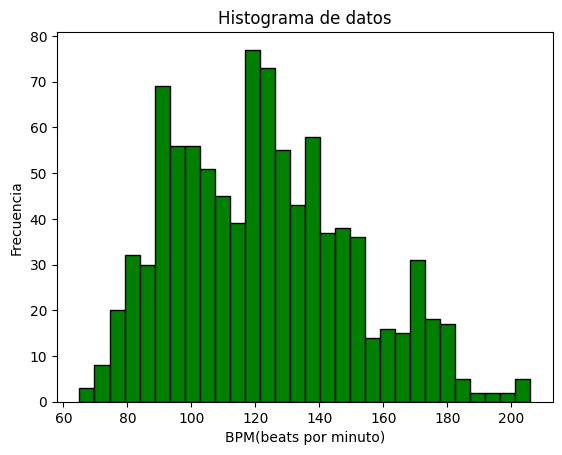

Se parece a la distribucion Normal o campana de Gauss


In [36]:
#Grafica de BPM
import matplotlib.pyplot as plt
import numpy as np

# Generar datos aleatorios
bpm = df['bpm']  #obtengo la columna del csv

# Para convertir la serie en una lista.
lista_datos = bpm.tolist()

#data = np.random.randn(1000)

# Crear el histograma
plt.hist(lista_datos, bins=30, color='Green', edgecolor='black')

# Añadir título y etiquetas
plt.title('Histograma de datos')
plt.xlabel('BPM(beats por minuto)')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()
print("Se parece a la distribucion Normal o campana de Gauss")


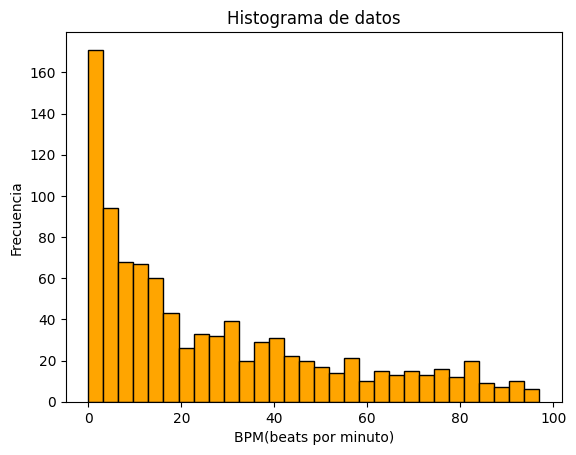

Parece una distirbucion de Poisson


In [38]:
#Grafica de que tan acustica es una cancion
import matplotlib.pyplot as plt
import numpy as np

# Generar datos aleatorios
acousticness = df['acousticness_%']  #obtengo la columna del csv

# Para convertir la serie en una lista.
lista_datos = acousticness.tolist()

#data = np.random.randn(1000)

# Crear el histograma
plt.hist(lista_datos, bins=30, color='orange', edgecolor='black')

# Añadir título y etiquetas
plt.title('Histograma de datos')
plt.xlabel('acustica')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()
print("Parece una distirbucion exponencial")

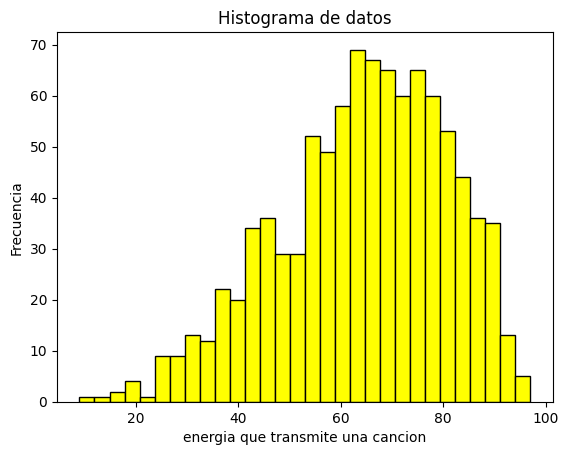

Parece una distirbucion de Poisson


In [41]:
#Grafica de la energia que transmite una cancion
import matplotlib.pyplot as plt
import numpy as np

# Generar datos aleatorios
energy = df['energy_%']  #obtengo la columna del csv

# Para convertir la serie en una lista.
lista_datos = energy.tolist()

#data = np.random.randn(1000)

# Crear el histograma
plt.hist(lista_datos, bins=30, color='yellow', edgecolor='black')

# Añadir título y etiquetas
plt.title('Histograma de datos')
plt.xlabel('energia que transmite una cancion')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()
print("Parece una distirbucion de Poisson")